# Multiple Linear Regression

In this notebook, we will continue practicing:

- How to perform regression with multiple variables
- How to handle categorical variables in regression
- How to evaluate and compare models to determine the best one


## Imports

In [42]:
import numpy as np  # linear algebra
import pandas as pd  # data manipulation and processing
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # more attractive visualizations
import statsmodels.api as sm  # will help us apply regression model
import statsmodels.formula.api as smf
from scipy.stats import spearmanr, pearsonr, chi2_contingency

# Getting the Data

In [43]:
#https://www.kaggle.com/datasets/gauravduttakiit/real-estate-price/data
property_dataset = pd.read_csv("real_estate_price_size_year_view.csv")
property_dataset.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [44]:
#Data Dictionary
#Price: The selling price of the property.
#Size: The size of the property in square feet.
#Year: The year the property was built.
#View: if the property has a Sea view or not.

## What is the size of the dataset?

In [45]:
property_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
 2   year    100 non-null    int64  
 3   view    100 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


## Get insights about the data using descriptive statistics.

In [46]:
property_dataset.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


## Which numeric features are correlated with each other?

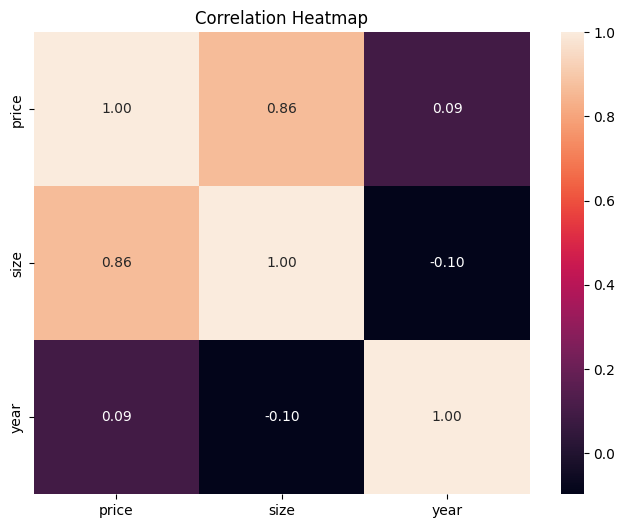

In [47]:
corr = property_dataset.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Based on the correlation matrix, which features seem to be most correlated with the target variable (price)?

In [48]:
corr['price'].sort_values

<bound method Series.sort_values of price    1.000000
size     0.862983
year     0.093014
Name: price, dtype: float64>

## What is the type of the "view" column? and how many unique values does it have?

In [49]:
type = property_dataset['view'].dtypes
print(type)
property_dataset['view'].value_counts()

#ver se estao bem distribuidos

object


view
No sea view    51
Sea view       49
Name: count, dtype: int64

## For work with view column we need to convert it to binary values. Convert the "view" using .map() function so that "Sea view" is represented as 1 and "No sea view" as 0.

In [51]:
property_dataset['view'] = property_dataset['view'].map({'Sea view': 1, 'No sea view': 0})
property_dataset.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


# Fist regression model

## For starting, let's create a regression model using only the "size" feature to predict the "price". First create scatter plot to visualize the relationship between size and price.

In [52]:
#imagine we want to predict price based on size
X = property_dataset['size']
y = property_dataset['price']

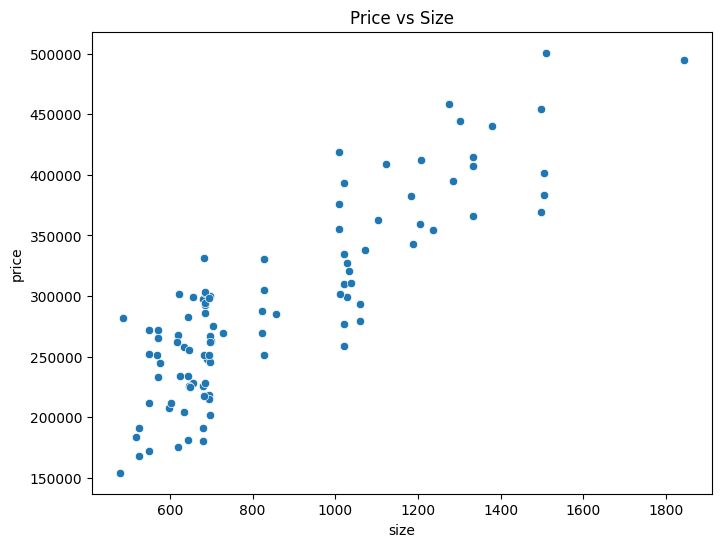

In [55]:
#create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=y)
plt.title("Price vs Size")
plt.show()

## Based on the scatter plot, does there appear to be a relationship between size and price?

In [ ]:
# Existe uma relacao linear positiva entre size e price

## Calculate the Spearman and Pearson correlation coefficients between size and price. What do these coefficients indicate about the relationship between these two variables?

In [ ]:
spearman_corr, spearman_p = spearmanr(property_dataset['size'], property_dataset['price'])
print(f"Spearman Correlation: {spearman_corr}, P-value: {spearman_p}")

pearson_corr, pearson_p = pearsonr(property_dataset['size'], property_dataset['price'])
print(f"Pearson Correlation: {pearson_corr}, P-value: {pearson_p}")

#p value dos dois teste é inferior a 0.05, logo existe correlacao estatisticamente significativa

Spearman Correlation: 0.7994862084711543, P-value: 2.029248670485123e-23
Pearson Correlation: 0.8629827267012699, P-value: 8.127632219790057e-31


## Now, let's create a linear regression model using "size" as the independent variable to predict "price". Use the statsmodels library to fit the model and display the summary of the regression results.

In [ ]:
# linear regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

#equacao da reta: price = 10.190 + 223.size
#se o p value for superior a 0.05, nao ha correlacao estatisticamente significativa temos que remover a variavel
# o r square indica a percentagem de que as variaveis afetam a variavel dependente(price)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           8.13e-31
Time:                        08:31:03   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.0

## From previous class we already know about r-squared. What is the R-squared value of this model and what does it indicate about the model's performance?

In [ ]:
#r square é 0.745 indicando que é um bom modelo

## Lets try to evaluate the model using RMSE (Root Mean Squared Error). Calculate the RMSE for this regression model.

In [ ]:
#calculate RMSE
predictions = model.predict(X)
rmse = np.sqrt(np.mean((predictions - y) ** 2))
print(f"Root Mean Squared Error: {rmse}")

#rmse calcula a media dos erros do modelo de regressao linear ou seja os residuos entre os valores reais e os valores previstos pelo modelo

Root Mean Squared Error: 38733.97357182569


## Compare RMSE to the mean size of the properties in the dataset. What does this comparison tell you about the model's predictive accuracy?

In [ ]:
#what RMSE means in this context
mean_size = np.mean(y)
print(f"Mean Price: {mean_size}")
print(f"RMSE as percentage of Mean Price:", (rmse / mean_size) * 100, "%")

#significa que em media o modelo erra cerca de 13 %

Mean Price: 292289.47015999997
RMSE as percentage of Mean Price: 13.251922332550201 %


# Second regression model with categorical variable

## Does having a sea view impact the price of the property? Let's investigate this by incorporating the "view" feature into our regression model. Use the chi-squared test to determine if there is a significant association between "view" and "price".

In [ ]:
contigency_table = pd.crosstab(property_dataset['view'], property_dataset['price'])
chi2, p, dof, expected = chi2_contingency(contigency_table)
print("Chi2:", chi2)
print("P-value:", p)

#chi squared test for independence between 'view' and 'price' categories
#p value é menor que 0.05 logo existe dependencia estatisticamente significativa

Chi2: 99.99999999999997
P-value: 0.4529585113209321


## Chi-squared is enough for determine if there is association between categorical and numeric variable?

## Create a new regression model that includes both "size" and "view" as independent variables to predict "price". Fit the model using statsmodels and display the summary of the regression results.

In [ ]:
X = property_dataset[['size', 'view']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

#price = 77480 + 217.7 . size + 57560 . view 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.4
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           2.44e-46
Time:                        09:11:29   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2323.
Df Residuals:                      97   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.748e+04   8337.182      9.294      0.0

## Compare the R-squared value of this new model with the previous model that only included "size". How does the inclusion of "view" affect the model's performance?

## Use also RMSE to evaluate this new model. Interpret the results.

In [ ]:
predictions = model.predict(X)
rmse = np.sqrt(np.mean((predictions - y) ** 2))
print(f"Root Mean Squared Error: {rmse}")

#what RMSE means in this context
mean_size = np.mean(y)
print(f"Mean Price: {mean_size}")
print(f"RMSE as percentage of Mean Price:", (rmse / mean_size) * 100, "%")

#significa que em media o modelo erra cerca de 8 %


Root Mean Squared Error: 25963.243677355378
Mean Price: 292289.47015999997
RMSE as percentage of Mean Price: 8.882716049655514 %


## Is this model is better than previeous one

In [ ]:
#sim 

## Interpret the coefficient of the "view" variable in the context of the model. What does this coefficient tell you about the impact of having a sea view on the price of the property?

# Third regression model with all features

## Create a final regression model that includes all three features: "size", "view", and "year". Fit the model using statsmodels and display the summary of the regression results.

In [69]:
X = property_dataset[['size', 'view', 'year']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           1.02e-50
Time:                        09:18:04   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.0

## Is this model better than the previous two models? Justify your answer using R-squared and RMSE.

In [71]:
predictions = model.predict(X)
rmse = np.sqrt(np.mean((predictions - y) ** 2))
print(f"Root Mean Squared Error: {rmse}")

#what RMSE means in this context
mean_size = np.mean(y)
print(f"Mean Price: {mean_size}")
print(f"RMSE as percentage of Mean Price:", (rmse / mean_size) * 100, "%")

#significa que em media o modelo erra cerca de 7 %


Root Mean Squared Error: 22630.753896978447
Mean Price: 292289.47015999997
RMSE as percentage of Mean Price: 7.742582681678652 %


## Interpret the coefficients of all variables in the context of the model. What do these coefficients tell you about the impact of each feature on the price of the property? Create the final equation for predicting price based on size, view, and year.